<a href="https://colab.research.google.com/github/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/07-Bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://github.com/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/img/bokeh-logo.png?raw=1" width="800"/>
</div>

<h1>Bokeh</h1>
<h3>Graficación interactiva</h4>

Bokeh es un módulo de Python para crear visualizaciones interactivas para navegadores web. Bokeh ayuda a crear gráficos llamativos, desde simples trazados hasta dashboards interactivos. Este módulo permite crear visualizaciones basadas en JavaScript sin necesidad de escribir JavaScript.

[Documentación](https://docs.bokeh.org/en/latest/)

In [1]:
from bokeh.io import output_notebook, show
output_notebook()

En esta breve notebook mostraremos algunas gráficas básicas con Bokeh usando scatter plots con información adicional sobre los puntos. Esto con la intención de dar una pequeña introducción y mostrar lo que se puede hacer con Bokeh.

# Graficando puntos en el plano

Definimos un arreglo con las coordenadas de los puntos que queremos graficar

In [ ]:
import numpy as np

puntos = np.array([[1, 2, 3, 4, 5], [6, 7, 2, 4, 5]])
print(puntos)

[[1 2 3 4 5]
 [6 7 2 4 5]]


Observar que graficamos el gráfico tipo *scatter plot* con el método [`circle`](https://docs.bokeh.org/en/3.0.1/docs/reference/plotting/figure.html#bokeh.plotting.figure.circle). También podemos usar otro tipo de marcadores: [documentación](https://docs.bokeh.org/en/3.0.1/docs/user_guide/basic/scatters.html).

Observar que hasta aquí, es una gráfica similar a las que hemos hecho con **matplotlib**. Aunque, en esta gráfica podemos hacer zoom y scrolling.

In [ ]:
from bokeh.plotting import figure, show

# Inicializamos una figura con algunos atributos deseados:
figura = figure(width=400, height=400,
           toolbar_location="below")

figura.title.text = 'Varios puntos en el plano' # Añadimos un título a la figura

figura.circle(puntos[0,:], puntos[1,:],
         size=20, color="navy", alpha=0.5) # Añadimos los marcadores tipo "circle" a la figura

show(figura) # Mostramos el resultado

Ahora, añadamos algunos elementos interactivos a la figura.

Añadamos una herramienta interactiva [HoverTool](https://docs.bokeh.org/en/2.4.2/docs/user_guide/tools.html#hovertool) para inspeccionar elementos en la gráfica. Esto lo hacemos mediante el método `add_tools()` de la figura.

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Inicializamos una figura con algunos atributos deseados:
figura = figure(width=400, height=400,
           toolbar_location="below")

figura.title.text = 'Varios puntos en el plano'

# ---- Añadimos los marcadores tipo "star" a la figura
figura.star(puntos[0,:], puntos[1,:],
              size=20, color="navy", alpha=0.5) # Añadimos los puntos a la gráfica

# ---- Definimos la herramienta que añadiremos a la gráfica ----
hover = HoverTool()
hover.tooltips = [
    ("índice del punto", "$index"),   # 'index', 'x', 'y' son atributos predefinidos
    ("(x,y)", "($x, $y)")
    ]

# ---- Añadimos la herramienta a la gráfica ----
figura.add_tools(hover)

show(figura)

Cuando hemos terminado con la gráfica, la podemos salvar en un archivo HTML para visualizar en cualquier navegador de internet.

In [ ]:
from bokeh.plotting import output_file, save

output_file("grafica_bokeh.html")
save(figura)

'/content/grafica_bokeh.html'

# Ejemplo

Retomemos el ejemplo y gráfica de la notebook pasada

In [1]:
!pip install wget

import wget
import numpy as np

url = "https://github.com/gmauricio-toledo/Curso-Python-2023/raw/main/Notebooks/funciones.py"
fname = url.split('/')[-1]
wget.download(url, fname)

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=f4014a1103640c8430c11d5d47293a53ec16e03c01464d82579c13708fa0f232
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'funciones.py'

In [2]:
from funciones import secante, falsa_posicion

def f(x):
    y = x**3 - 9*x**2 + 26*x - 23.8
    return y

resultados_fp = falsa_posicion(f,xl=2.5,xu=3.5,
                               tolerancia=0.0001)
resultados_sc = secante(f,x0=2.5,x1=3,tolerancia=0.0001)

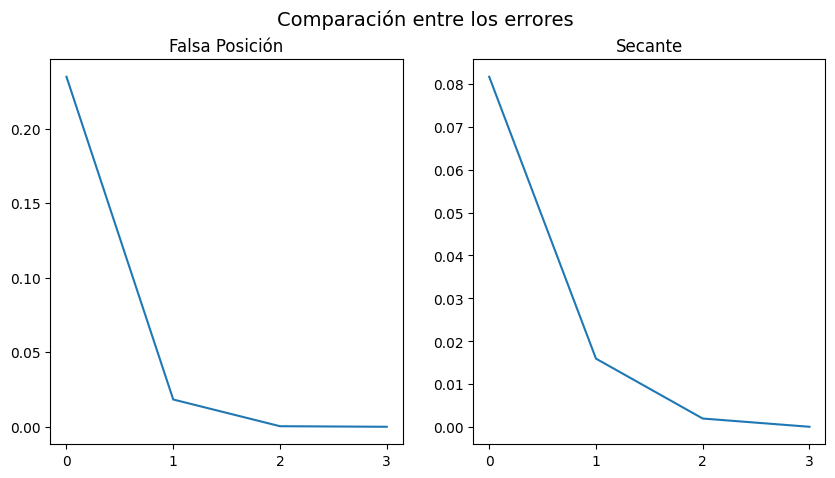

In [3]:
import matplotlib.pyplot as plt

errores_fp = resultados_fp['errores']
num_iteraciones_fp = resultados_fp['iteraciones']
errores_sc = resultados_sc['errores']
num_iteraciones_sc = resultados_sc['iteraciones']

fig, (ax1, ax2) = plt.subplots(1,2,)
fig.set_figwidth(10)
fig.set_figheight(5)
# fig.set_dpi(200)
fig.suptitle('Comparación entre los errores',fontsize=14)
ax1.plot(list(range(num_iteraciones_fp)),
         errores_fp)
ax1.set_xticks(list(range(num_iteraciones_fp)))
ax1.set_title("Falsa Posición")
ax2.plot(list(range(num_iteraciones_sc)),
         errores_sc)
ax2.set_xticks(list(range(num_iteraciones_sc)))
ax2.set_title("Secante")
fig.show()